In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1- Data Gathering

## a- Loading Data

In [5]:
df = pd.read_csv('fuel-econ.csv')

## b- Data Preview

In [6]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [7]:
df.tail()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5
3928,39901,Lexus,LS 500 AWD,2018,Midsize Cars,All-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,18.0431,22.6000,27.0000,39.3000,21.3945,417,4,4


- Tidy Issue in **pv2, pv4** columns

# 2- Inspect Data

In [8]:
df.shape

(3929, 20)

In [9]:
df.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

- Tidy Issue **year** column should be data

# 3- Data Backup

In [11]:
# take a backup of my original DataFarme
df_backup = df.copy

# 4- Quality Issues
- i- Missing Data
- ii- Dublicate Data
- iii- Inconsisted Data Types
- ix- Inconsistant Data

## 3-i Missing values

In [13]:
# check missing Values
df.isna().sum()

,0
id,0
make,0
model,0
year,0
VClass,0
drive,0
trans,0
fuelType,0
cylinders,0
displ,0


- No Missing Values

## 3-ii Dublicated Data

In [15]:
# check Dublicate
df.duplicated().sum()

0

- No Dublicated Rows

## 3-iii Inconsistant Data Type

In [16]:
# check Data Type foreach column
df.dtypes

,0
id,int64
make,object
model,object
year,int64
VClass,object
drive,object
trans,object
fuelType,object
cylinders,int64
displ,float64


### iii-a Define
- **year** column Should be 'date'

### iii-b Code

In [17]:
# convert 'year' column Datatype to be 'date'
df['year'] = pd.to_datetime(df['year'], format='%Y')

### iii-c Test

In [18]:
df.dtypes

,0
id,int64
make,object
model,object
year,datetime64[ns]
VClass,object
drive,object
trans,object
fuelType,object
cylinders,int64
displ,float64


## 3-iv- Inconsistant Values

- Has No Inconsistant Values

# 5- Tidiness Issues
- i- Each variable forms a column
- ii- Each observation forms a row
- iii- Each type of observational unit forms a table

### i-a Define
- **pv2, pv4** Values forms Columns

### i-b Code

In [19]:
# using melt function to handle two columns
#   - assing pv2 and pv4 Values to a column ['efficiency_value'] variable
#   - assing the values of pv2 and pv4 columns to ['pv_value'] column

df_2 = df.melt(
    id_vars=['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans',
             'fuelType', 'cylinders', 'displ', 'city', 'UCity', 'highway',
             'UHighway', 'co2', 'feScore', 'ghgScore'],
    value_vars=['pv2', 'pv4'],
    var_name='efficiency_value',
    value_name='pv_value'
)


### i-c Test

In [20]:
df_2.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,city,UCity,highway,UHighway,co2,feScore,ghgScore,efficiency_value,pv_value
0,32204,Nissan,GT-R,2013-01-01,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,16.4596,20.2988,22.5568,30.1798,471,4,4,pv2,79
1,32205,Volkswagen,CC,2013-01-01,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,21.8706,26.9770,31.0367,42.4936,349,6,6,pv2,94


- ii- Each observation forms a row
    - Not an Issues
- iii- Each type of observational unit forms a table
    - Not an Issues

# 6- Export as CSV file


In [ ]:
df_2.to_csv('fuel-econ-v2.csv', index=False)

# 7- Visualization
- i- Efficiency vs. Emissions
- ii- Engine Displacement vs. Fuel Economy.
- iii- Vehicle Class Comparison
- ix- Manufacturers' Performance
- x- Correlation Between Features

## i- Efficiency vs. Emissions
- Understanding how fuel efficiency metrics (e.g., city, highway, combined MPG) correlate with CO2 emissions across different vehicle classes

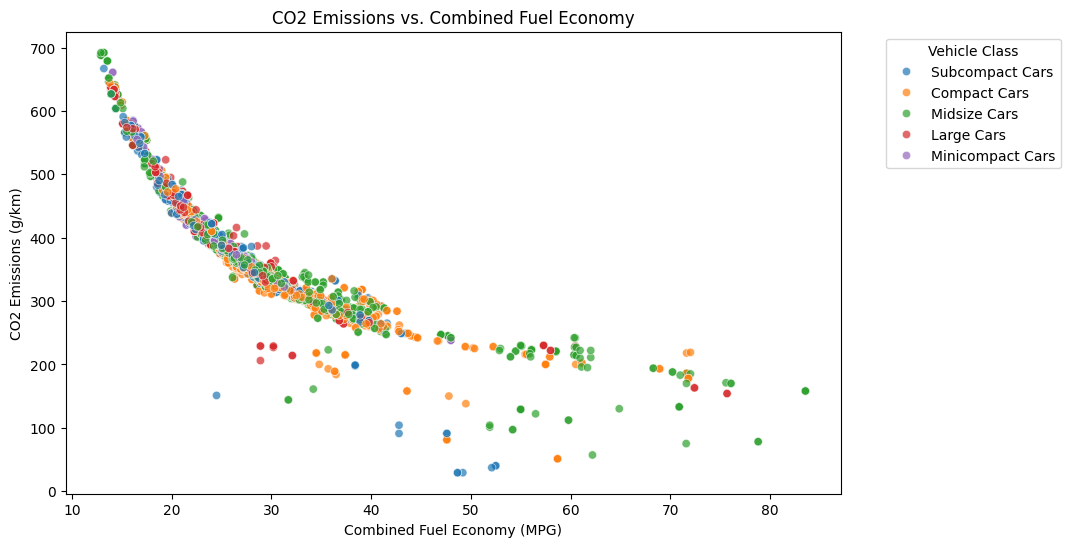

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='UCity', y='co2', hue='VClass', alpha=0.7)
plt.title('CO2 Emissions vs. Combined Fuel Economy')
plt.xlabel('Combined Fuel Economy (MPG)')
plt.ylabel('CO2 Emissions (g/km)')

plt.legend(title='Vehicle Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## ii- Engine Displacement vs. Fuel Economy.
- Analyzing how engine displacement and the number of cylinders affect fuel economy and emissions

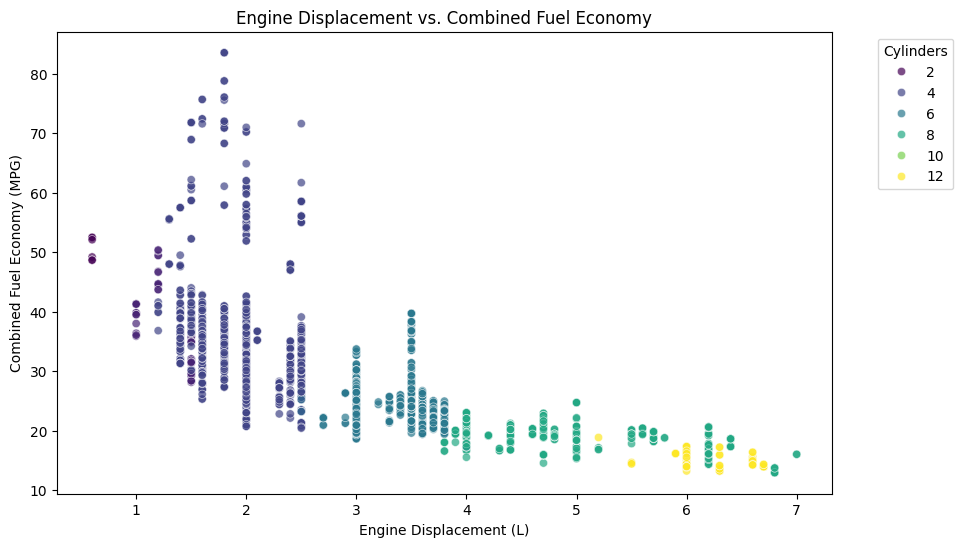

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='displ', y='UCity', hue='cylinders', palette='viridis', alpha=0.7)
plt.title('Engine Displacement vs. Combined Fuel Economy')
plt.xlabel('Engine Displacement (L)')
plt.ylabel('Combined Fuel Economy (MPG)')

plt.legend(title='Cylinders', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## iii- Combined Fuel Economy by Vehicle Class
- Identifying which vehicle classes tend to be more fuel-efficient or emit less CO2

<ipython-input-23-565b49f661ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='VClass', y='UCity', palette='Set3')


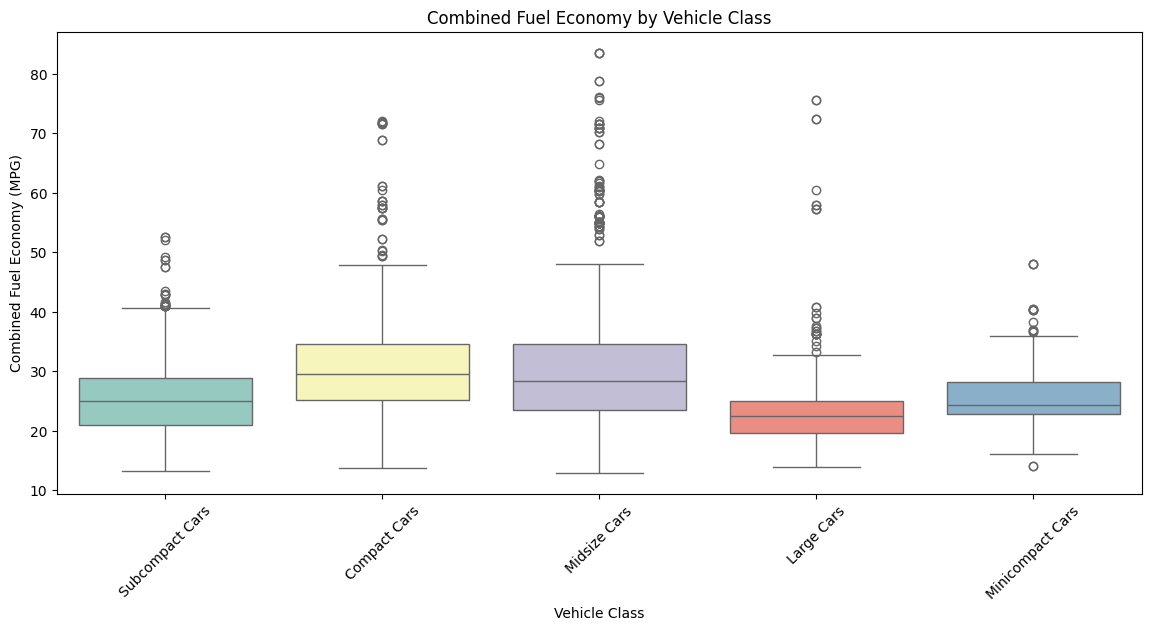

In [23]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='VClass', y='UCity', palette='Set3')
plt.title('Combined Fuel Economy by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Combined Fuel Economy (MPG)')

plt.xticks(rotation=45)
plt.show()

## iv- Manufacturers' Performance:

- Comparing fuel economy and emissions across different manufacturers to see if some consistently perform better or worse.

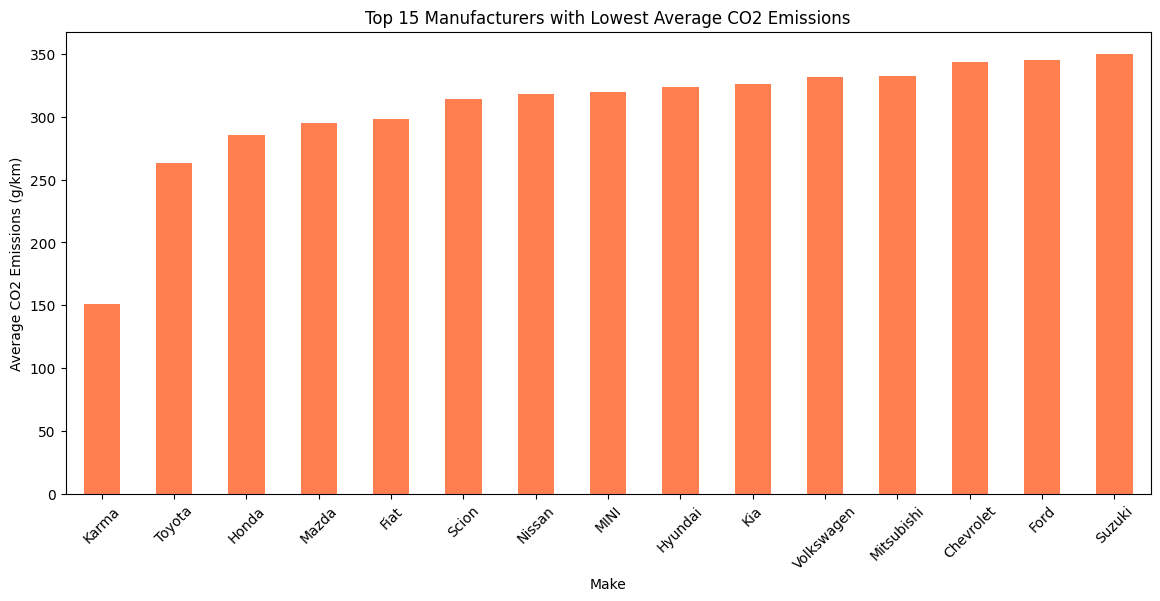

In [24]:
# Average CO2 emissions by make
avg_co2_by_make = df.groupby('make')['co2'].mean().sort_values()

plt.figure(figsize=(14, 6))
avg_co2_by_make.head(15).plot(kind='bar', color='coral')
plt.title('Top 15 Manufacturers with Lowest Average CO2 Emissions')
plt.xlabel('Make')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

## v- Correlation Between Features

- Identifying the relationships between numeric variables like CO2, combined MPG, engine size, and cylinders.

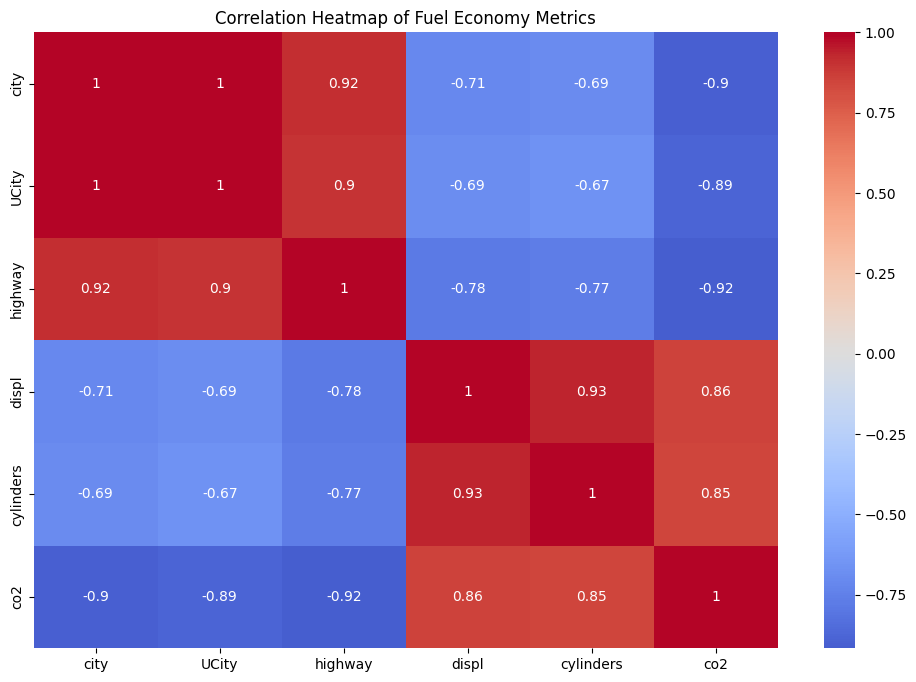

In [25]:
plt.figure(figsize=(12, 8))
corr = df[['city', 'UCity', 'highway', 'displ', 'cylinders', 'co2']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Fuel Economy Metrics')
plt.show()
